##### Name : Alhagie Boye
##### Course: CS2621 131
##### Title: Midterm project
##### Date: 03/05/2024

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and Data Cleaning

In [2]:
datapath = "C:/Users/boyea/OneDrive - Milwaukee School of Engineering/Desktop/DataScience/Lab docs/bird.csv"
df = pd.read_csv(datapath)
print(df)

      id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0      0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1      1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2      2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3      3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4      4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   
..   ...    ...   ...    ...    ...    ...   ...    ...   ...    ...   ...   
415  415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15   
416  416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15   
417  417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21   
418  418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24   
419  419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05   

    type  
0     SW  
1     SW  
2     SW  
3     SW  
4     SW

**Visualizing the data using scatter plot and also to check for outliers.**

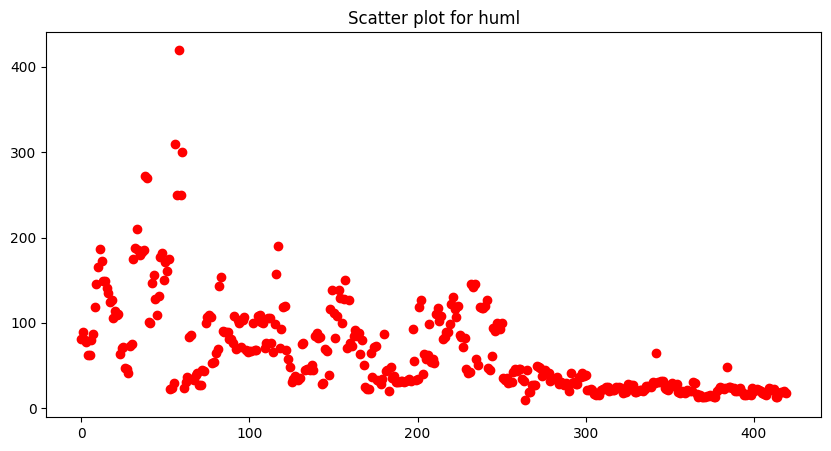

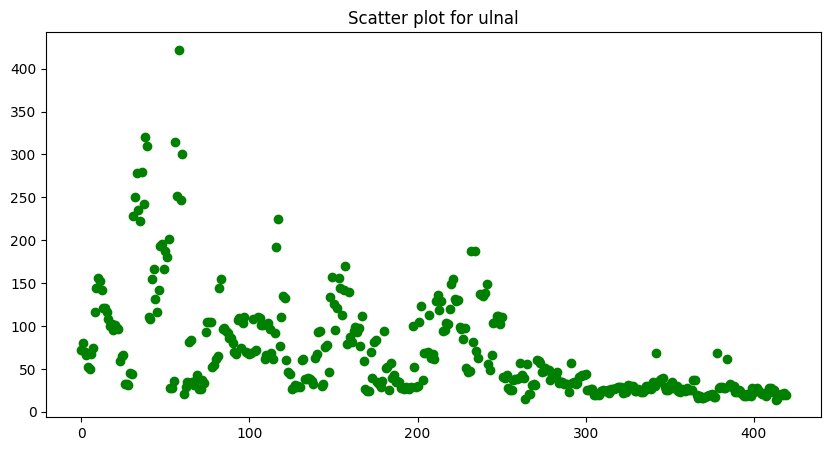

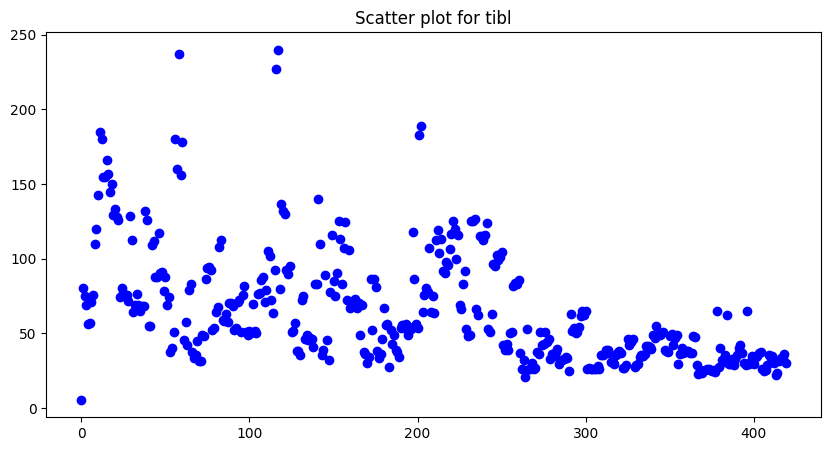

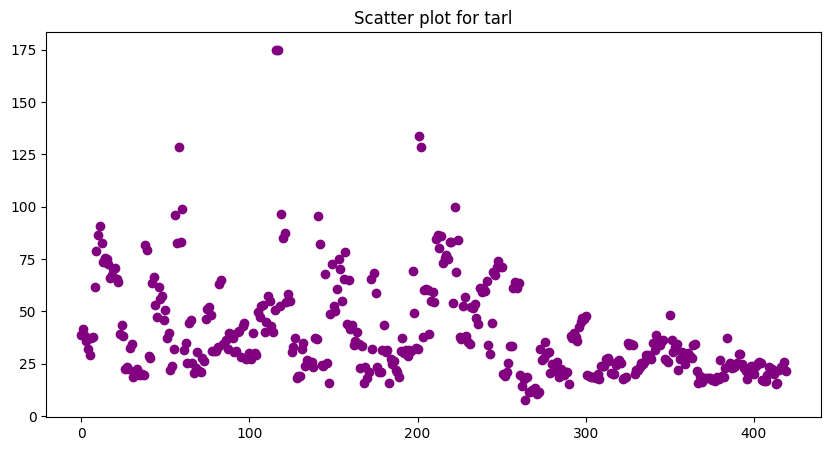

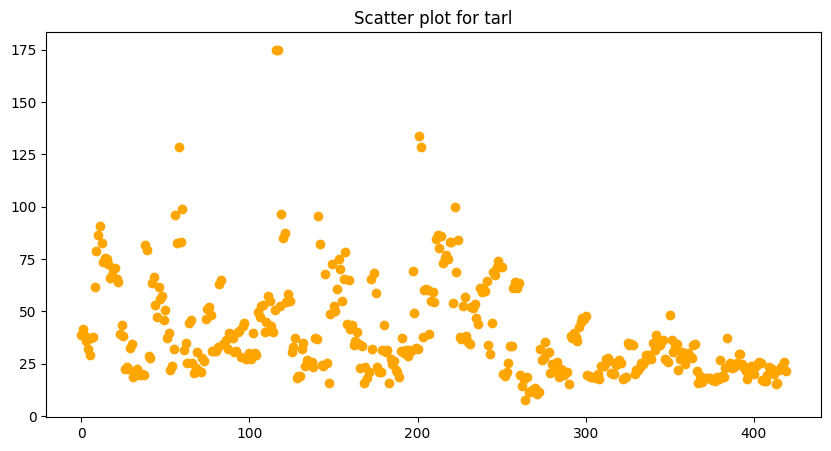

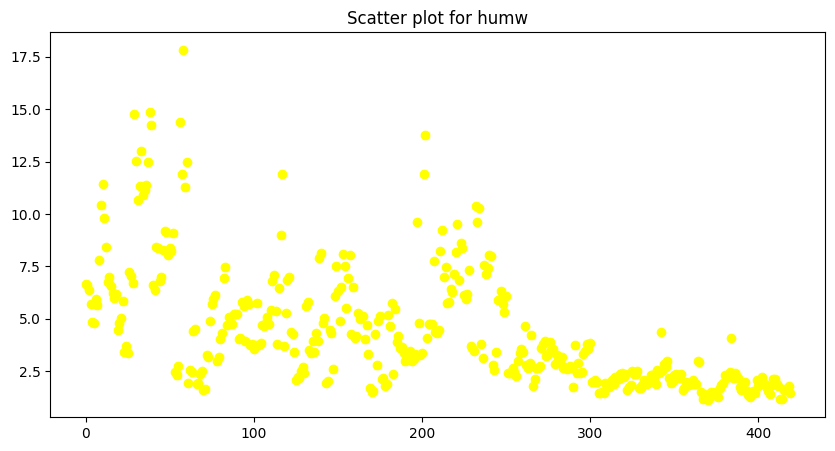

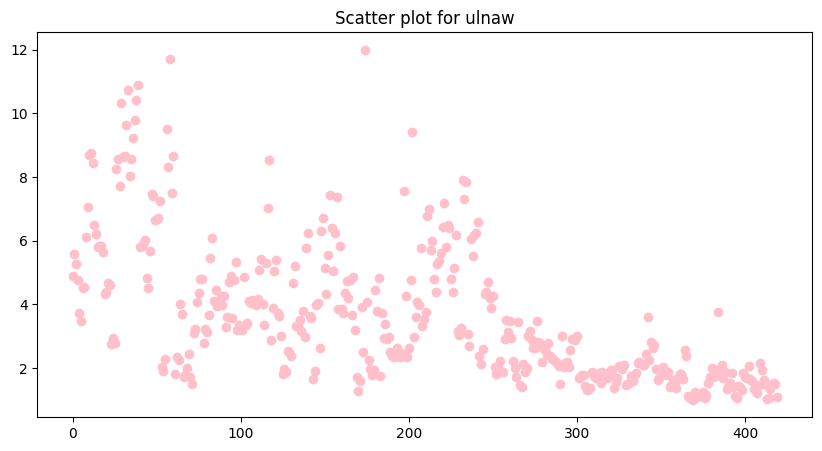

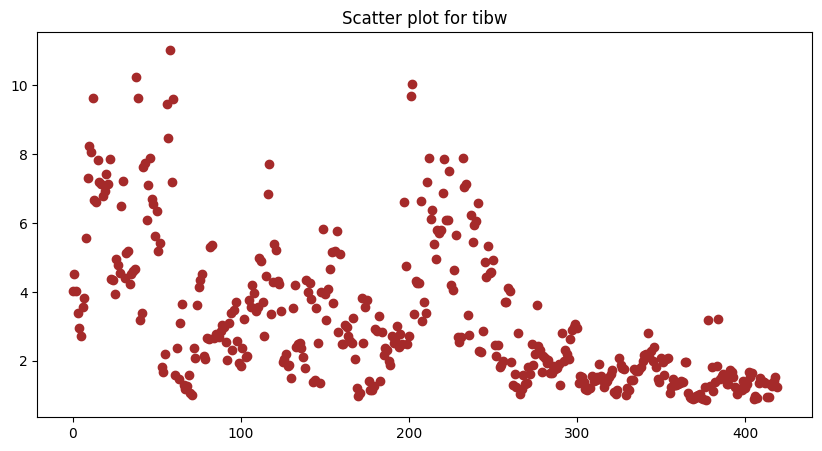

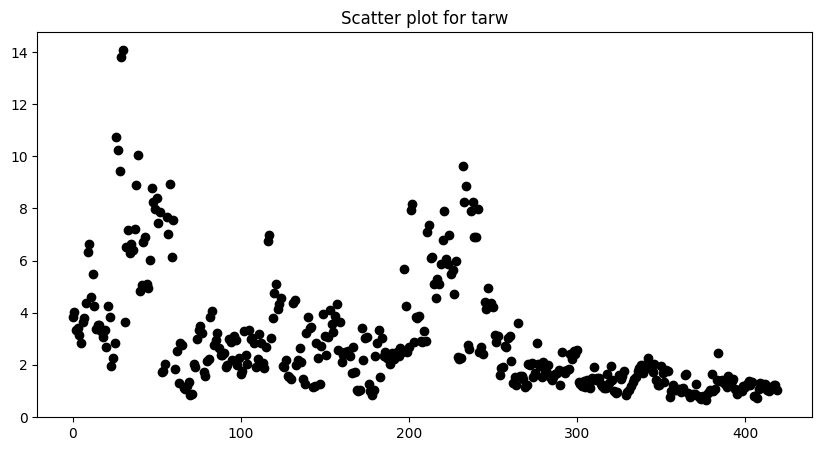

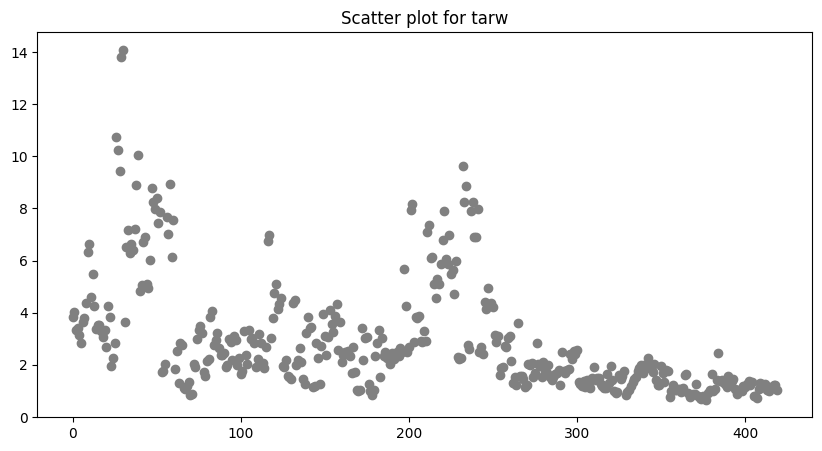

In [21]:
# List of traits
traits = ['huml', 'ulnal', 'tibl', 'tarl', 'tarl'
          ,'humw', 'ulnaw', 'tibw', 'tarw', 'tarw']
colors = ['red', 'green', 'blue', 'purple', 'orange',
           'yellow', 'pink', 'brown', 'black', 'grey']

for trait, color in zip(traits, colors):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(df[trait])), df[trait], color=color)
    plt.title(f'Scatter plot for {trait}')
    plt.show()

In [19]:
# checking for skewness
for trait in traits:
    print(f'Skewness for {trait} is {stats.skew(df[trait])}')

Skewness for huml is 2.023038583722791
Skewness for ulnal is 2.0917500091163608
Skewness for tibl is 1.525505339508338
Skewness for tarl is 1.937432451205589
Skewness for tarl is 1.937432451205589
Skewness for humw is 1.489038537168588
Skewness for ulnaw is 1.2341355400156804
Skewness for tibw is 1.249083965904327
Skewness for tarw is 1.817289562365621
Skewness for tarw is 1.817289562365621


**Rationale**: The scatter plot is used to visualize the data to check for outliers and to see the relationship between the variables. it shows that the data has some outliers/points that significantly deviate from other observations 

**Finding any null values in the dataset and imputing them with the mean of the column.**

In [3]:
df.isnull().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

**Replacing the null values with the mean of the column and converting columns to the appropriate data type.**

In [22]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)
        # these cols also neeeds to be converted to float
        df[col] = df[col].astype(float)

print(df)

      id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0      0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1      1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2      2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3      3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4      4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   
..   ...    ...   ...    ...    ...    ...   ...    ...   ...    ...   ...   
415  415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15   
416  416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15   
417  417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21   
418  418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24   
419  419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05   

    type  
0     SW  
1     SW  
2     SW  
3     SW  
4     SW

In [23]:
# confirming that the missing values have been filled
df.isnull().sum()


id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

**Table that categorizes each variable in the data set by certain
parameters of your choosing (such as bone type, length, diameter, bird
category, etc.) Include this table in your writeup.**

| Variable | Length/Diameter   | Bone Type | Category |
|----------|--------|-----------|--------------|
| huml     | Length | Humerus   |Morphological |          
| humw     | Width  | Humerus   |Morphological |          
| ulnal    | Length | Ulna      |Morphological |           
| ulnaw    | Width  | Ulna      |Morphological |
| feml     | Length | Femur     |Morphological |
| femw     | Width  | Femur     |Morphological |
| tibl     | Length | Tibia     |Morphological |
| tibw     | Width  | Tibia     |Morphological |
| tarl     | Length | Tarsus    |Morphological |
| tarw     | Width  | Tarsus    |Morphological |
| type     | N/A    | N/A |      Bird Type |

**Using visualization and statistical testing techniques to
evaluate the relationship between the bone length and diameter and bird
category.**

C:\Users\boyea\AppData\Local\Temp\ipykernel_4760\587428048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'],palette='hls')


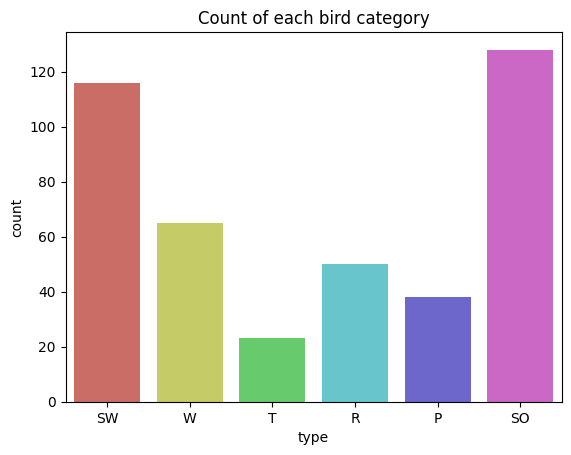

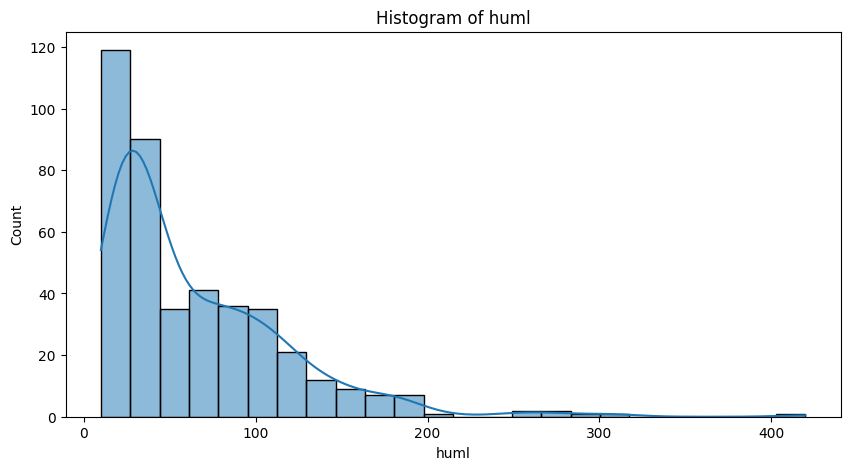

skewness: 2.023038583722791


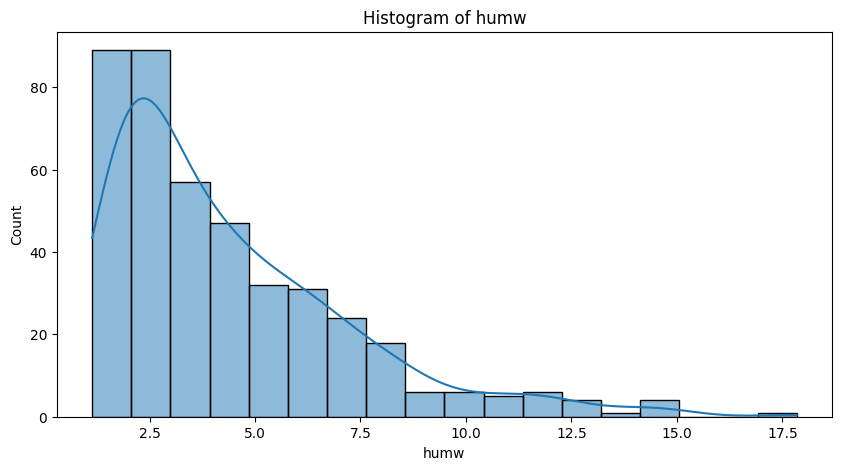

skewness: 1.489038537168588


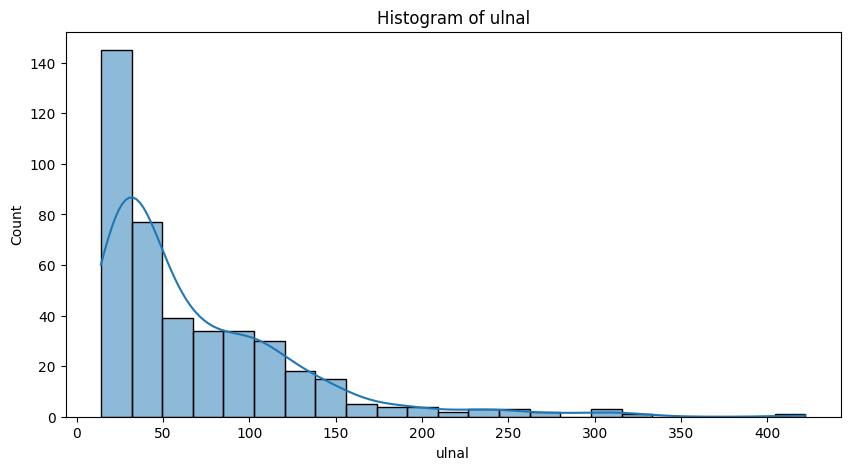

skewness: 2.0917500091163608


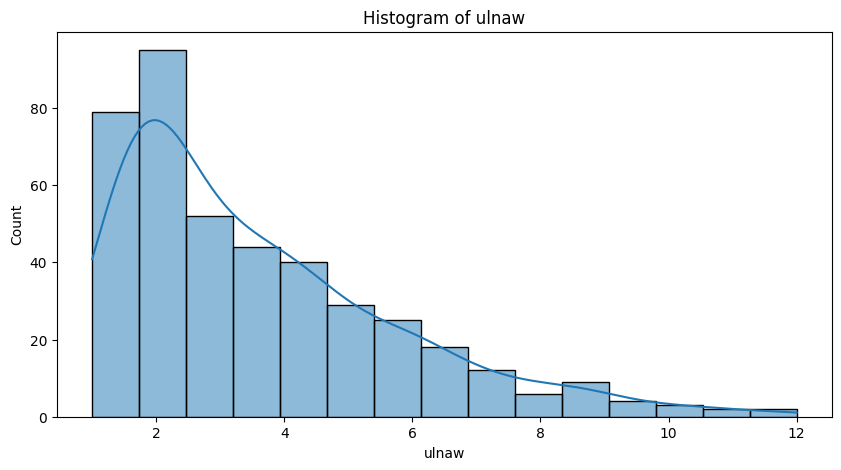

skewness: 1.2341355400156804


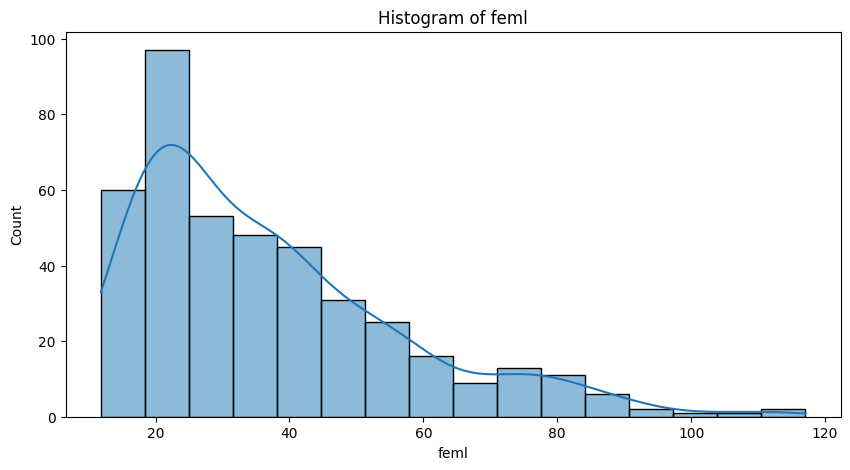

skewness: 1.219379659454095


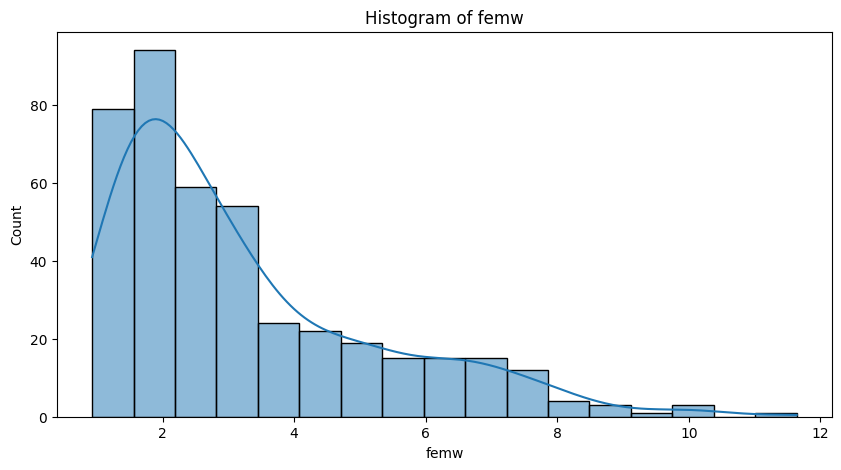

skewness: 1.2927288642832981


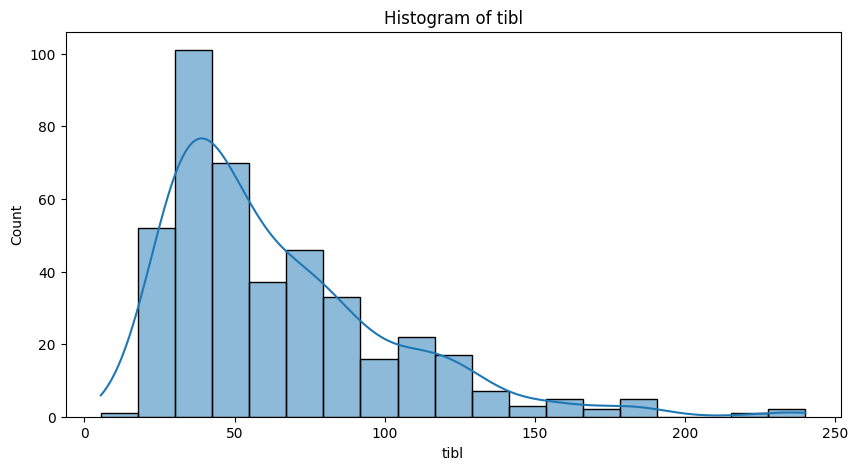

skewness: 1.525505339508338


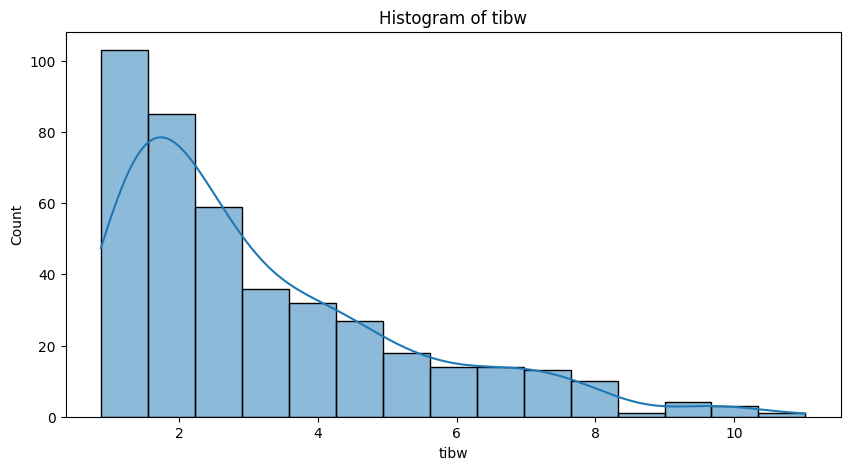

skewness: 1.249083965904327


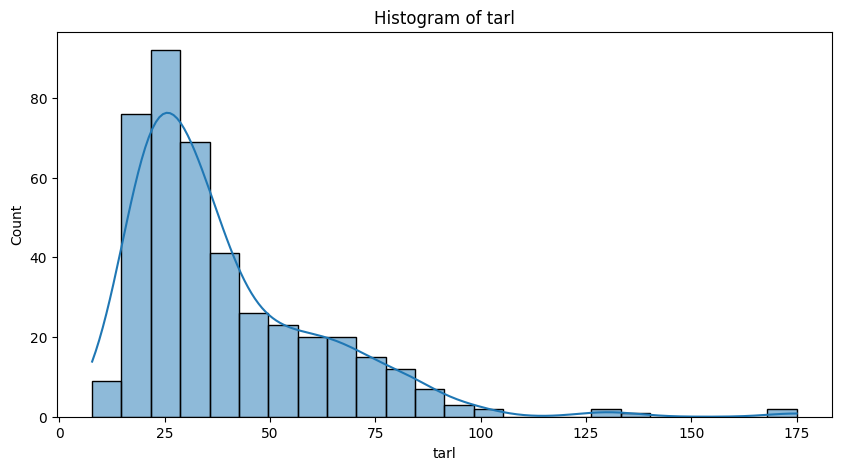

skewness: 1.937432451205589


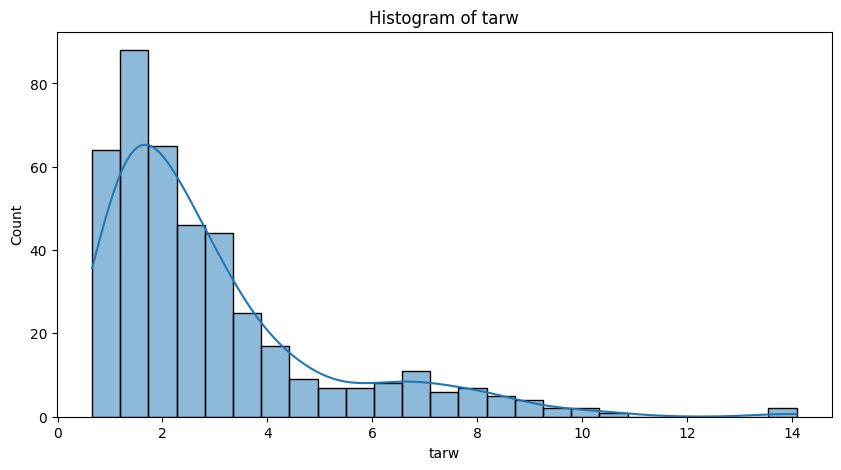

skewness: 1.817289562365621


In [24]:
sns.countplot(x=df['type'],palette='hls')
plt.title('Count of each bird category')
plt.show()
num_vars = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']

# Create a histogram for each numerical variable
for var in num_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()
    print(f'skewness: {stats.skew(df[var])}')
    


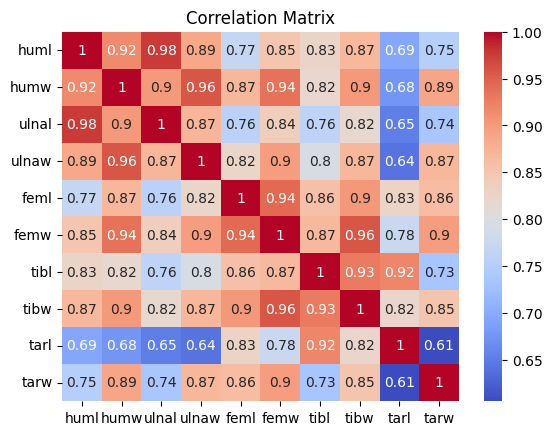

In [25]:
# Create a heatmap
sns.heatmap(df[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# Show the plot
plt.show()

Box plots to be used to visualize the relationship between the bone length and diameter and bird category. The box plot will show the distribution of the bone length and diameter for each bird category. The box plot will also be used to check for outliers in the data.

C:\Users\boyea\AppData\Local\Temp\ipykernel_4760\1552139729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=features[i], data=df, palette='hls')
C:\Users\boyea\AppData\Local\Temp\ipykernel_4760\1552139729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=features[i], data=df, palette='hls')
C:\Users\boyea\AppData\Local\Temp\ipykernel_4760\1552139729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=features[i], data=df, palette='hls')
C:\Users\boyea\AppData\Local\Temp\ipykernel_4760\1552139729.py:7

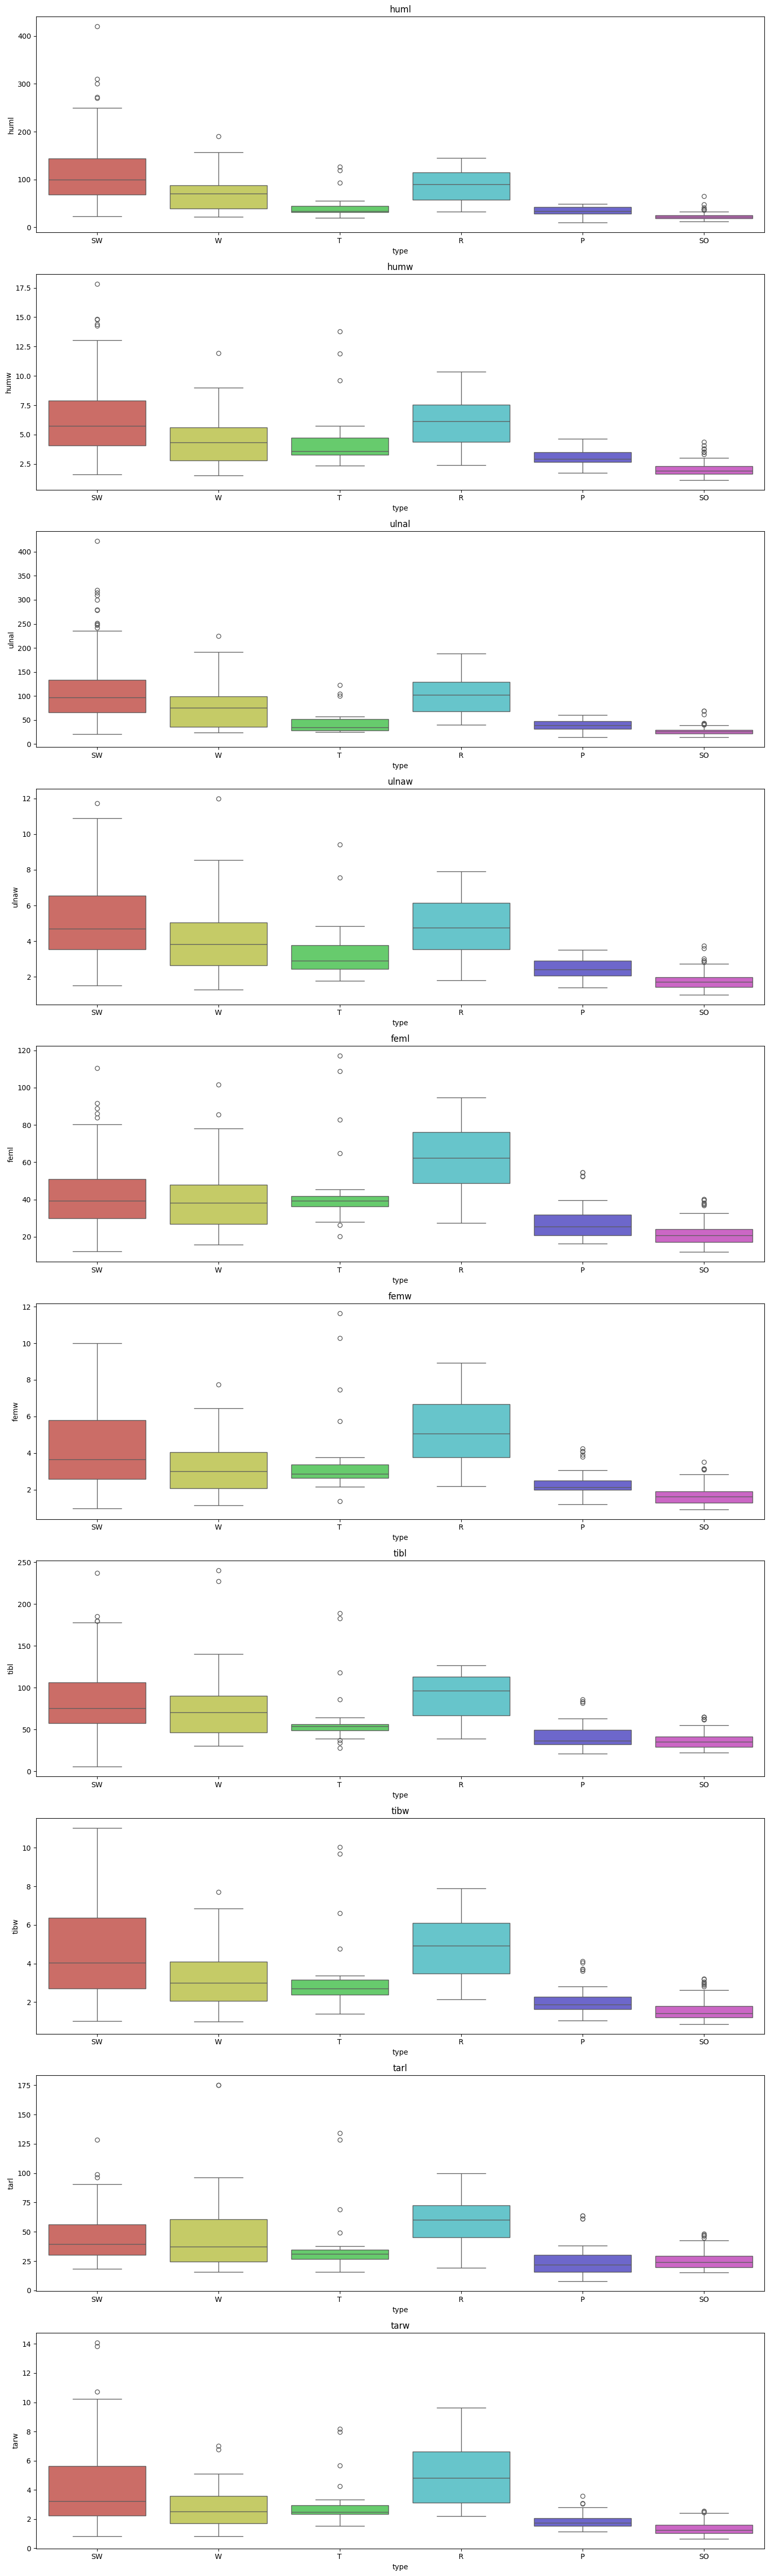

In [26]:
def boxes(features):
    n = len(features)
    plt.figure(figsize=(15, n*5))

    for i in range(n):
        plt.subplot(n, 1, i+1)
        sns.boxplot(x='type', y=features[i], data=df, palette='hls')
        plt.title(features[i])

    plt.tight_layout()
    plt.show()

boxes(num_vars)

**Kruskal-Wallis test will be used to test the relationship between the bone length and diameter and bird category.**

In [29]:
from scipy.stats import kruskal

num_vars = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']
num_df = df[num_vars]

stat_kruskal = []
p_value_kruskal = []
samples_by_group = []

for i in num_vars:
    samples_by_group = [group[i] for _, group in df.groupby('type')]
    stat, p = stats.kruskal(*samples_by_group)
    stat_kruskal.append(stat)
    p_value_kruskal.append(p)

significance = [p_value_kruskal[i] < 0.05 for i in range(len(p_value_kruskal))]
data = {'Variable': num_vars, 'kruskals h_stats': stat_kruskal,
                    'kruskals p_value': p_value_kruskal, 'stats_sig': significance}

data_table = pd.DataFrame(data)
print(data_table)

  Variable  kruskals h_stats  kruskals p_value  stats_sig
0     huml        282.936664      4.656219e-59       True
1     humw        242.951201      1.787582e-50       True
2    ulnal        249.269946      7.884223e-52       True
3    ulnaw        246.927493      2.507926e-51       True
4     feml        202.660428      7.660065e-42       True
5     femw        207.938083      5.685771e-43       True
6     tibl        215.023086      1.729504e-44       True
7     tibw        220.765861      1.018374e-45       True
8     tarl        142.415308      5.485023e-29       True
9     tarw        233.520919      1.881272e-48       True


**CHI-Square test will be used to test the relationship between the bone length and diameter and bird category.**

In [28]:
import pandas as pd
from scipy import stats

num_vars = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']
chi_stat_list = []
chi_p_value_list = []
variable_list = []

# Converting each numerical variable into categories
for var in num_vars:
    df[f'{var}_cat'] = pd.cut(df[var], bins=3, labels=['low', 'medium', 'high'])

# Perform a Chi-square test 
for var in num_vars:
    combination_counts = pd.crosstab(df[f'{var}_cat'], df['type'])
    stat, p, _, _ = stats.chi2_contingency(combination_counts)
    chi_stat_list.append(stat)
    chi_p_value_list.append(p)
    variable_list.append(var)

# Create a DataFrame to store results
chi_data = {'Variable': variable_list, 'Chi_stat': chi_stat_list, 'p_value': chi_p_value_list,
            'stats_sig': [p < 0.05 for p in chi_p_value_list]}
datatable_for_chi_square = pd.DataFrame(chi_data)

print(datatable_for_chi_square)

  Variable    Chi_stat       p_value  stats_sig
0     huml   67.734242  1.211635e-10       True
1     humw   91.856970  2.292257e-15       True
2    ulnal   48.942991  4.172404e-07       True
3    ulnaw  135.394440  3.694698e-24       True
4     feml  136.834309  1.875056e-24       True
5     femw  137.092223  1.660470e-24       True
6     tibl  115.410871  4.306484e-20       True
7     tibw  140.099640  4.020833e-25       True
8     tarl   74.222537  6.739660e-12       True
9     tarw   91.972445  2.174308e-15       True


The descriptive statistic of each trait tells us how for e.g. the humerus length and diameter for swimming a bird differs from that of singing bird.

In [31]:
# List of traits
traits = ['huml', 'ulnal', 'tibl', 'tarl', 'tarw']

# Calculating the descriptive statistics for each trait one by one
for trait in traits:
    desc = df.groupby('type')[trait].describe()
    # print(f"Descriptive statistics for {trait}:\n")
    # print(desc.to_markdown())
    # print("\n")

Descriptive statistics for huml:

| type   |   count |     mean |      std |   min |     25% |     50% |     75% |      max |
|:-------|--------:|---------:|---------:|------:|--------:|--------:|--------:|---------:|
| P      |      38 |  34.4239 |  9.39971 |  9.85 | 28.6975 |  33.8   |  42.305 |  49.12   |
| R      |      50 |  86.9344 | 31.7153  | 33.12 | 57.5    |  89.88  | 115.025 | 145      |
| SO     |     128 |  22.6915 |  7.14345 | 12.69 | 18.6875 |  21.605 |  25.37  |  64.6505 |
| SW     |     116 | 110.251  | 66.225   | 22.63 | 68.4125 | 100.065 | 143.5   | 420      |
| T      |      23 |  45.6996 | 28.0688  | 20.25 | 32.065  |  34.24  |  44.275 | 127      |
| W      |      65 |  73.1331 | 37.8423  | 22.39 | 38.79   |  70.93  |  88.16  | 190      |


Descriptive statistics for ulnal:

| type   |   count |     mean |      std |   min |     25% |     50% |      75% |      max |
|:-------|--------:|---------:|---------:|------:|--------:|--------:|---------:|---------:|
| P      |      38 |  39.1774 | 11.6389  | 14.73 | 31.9625 |  38.555 |  47.305  |  60.95   |
| R      |      50 |  99.7179 | 37.6816  | 39.85 | 67.6275 | 102.37  | 129.312  | 188      |
| SO     |     128 |  27.0656 |  8.70821 | 14.09 | 22.1225 |  25.72  |  29.3975 |  69.1154 |
| SW     |     116 | 111.756  | 75.8897  | 20.75 | 65.6875 |  96.935 | 133.75   | 422      |
| T      |      23 |  45.6174 | 27.2304  | 25.14 | 28.635  |  35.24  |  51.58   | 123.27   |
| W      |      65 |  78.1014 | 46.5423  | 24.16 | 36.33   |  75.44  |  99.31   | 225      |


Descriptive statistics for tibl:

| type   |   count |    mean |     std |   min |     25% |    50% |      75% |    max |
|:-------|--------:|--------:|--------:|------:|--------:|-------:|---------:|-------:|
| P      |      38 | 41.8813 | 17.1465 | 20.89 | 31.97   | 36.65  |  49.235  |  85.88 |
| R      |      50 | 89.8774 | 26.4892 | 38.99 | 66.585  | 96.36  | 113.207  | 126.54 |
| SO     |     128 | 36.7688 | 10.3038 | 22.13 | 28.825  | 35.535 |  41.3975 |  64.97 |
| SW     |     116 | 85.3171 | 39.8409 |  5.5  | 57.5875 | 75.275 | 106.03   | 237    |
| T      |      23 | 66.0909 | 41.866  | 27.67 | 49.035  | 53.77  |  56.435  | 189    |
| W      |      65 | 76.15   | 41.0739 | 30.31 | 46.24   | 70.39  |  89.93   | 240    |


Descriptive statistics for tarl:

| type   |   count |    mean |      std |   min |     25% |    50% |     75% |    max |
|:-------|--------:|--------:|---------:|------:|--------:|-------:|--------:|-------:|
| P      |      38 | 25.7874 | 14.8366  |  7.77 | 15.8225 | 21.895 | 30.54   |  63.91 |
| R      |      50 | 58.7676 | 19.1081  | 19.1  | 45.085  | 60.045 | 72.7925 |  99.72 |
| SO     |     128 | 25.8427 |  7.52548 | 15.19 | 19.845  | 24.31  | 29.6475 |  48.35 |
| SW     |     116 | 45.1562 | 20.8967  | 18.42 | 30.125  | 39.695 | 56.1375 | 128.35 |
| T      |      23 | 40.0865 | 30.7081  | 15.68 | 26.78   | 31     | 34.82   | 134    |
| W      |      65 | 47.5434 | 31.3781  | 15.8  | 24.64   | 37.17  | 60.81   | 175    |


Descriptive statistics for tarw:

| type   |   count |    mean |      std |   min |    25% |   50% |    75% |   max |
|:-------|--------:|--------:|---------:|------:|-------:|------:|-------:|------:|
| P      |      38 | 1.90263 | 0.573452 |  1.16 | 1.5325 | 1.74  | 2.0575 |  3.6  |
| R      |      50 | 5.031   | 2.0239   |  2.22 | 3.1275 | 4.835 | 6.6375 |  9.64 |
| SO     |     128 | 1.34937 | 0.423478 |  0.66 | 1.0475 | 1.265 | 1.6025 |  2.57 |
| SW     |     116 | 4.14991 | 2.67706  |  0.83 | 2.245  | 3.225 | 5.63   | 14.09 |
| T      |      23 | 3.18391 | 1.74685  |  1.55 | 2.34   | 2.49  | 2.945  |  8.19 |
| W      |      65 | 2.76031 | 1.33056  |  0.83 | 1.71   | 2.53  | 3.57   |  7    |
